# Module 6: Assignment
## Aaron Hum
### Stephanie Moyerman, PhD
#### LSC 541: Statistics for Biological Data Science I
##### 2024-08-06

In [3]:
load("tobacco_clr.Rdata")

## 1. Perform a PCA-based clustering analysis for the samples based on the data set "tobacco_clr$data".   

In [4]:
# Perform PCA
pca_result <- prcomp(tobacco_clr$data, scale. = TRUE)

In [5]:
# Extract the principal components
pc1 <- pca_result$x[, 1]
pc2 <- pca_result$x[, 2]

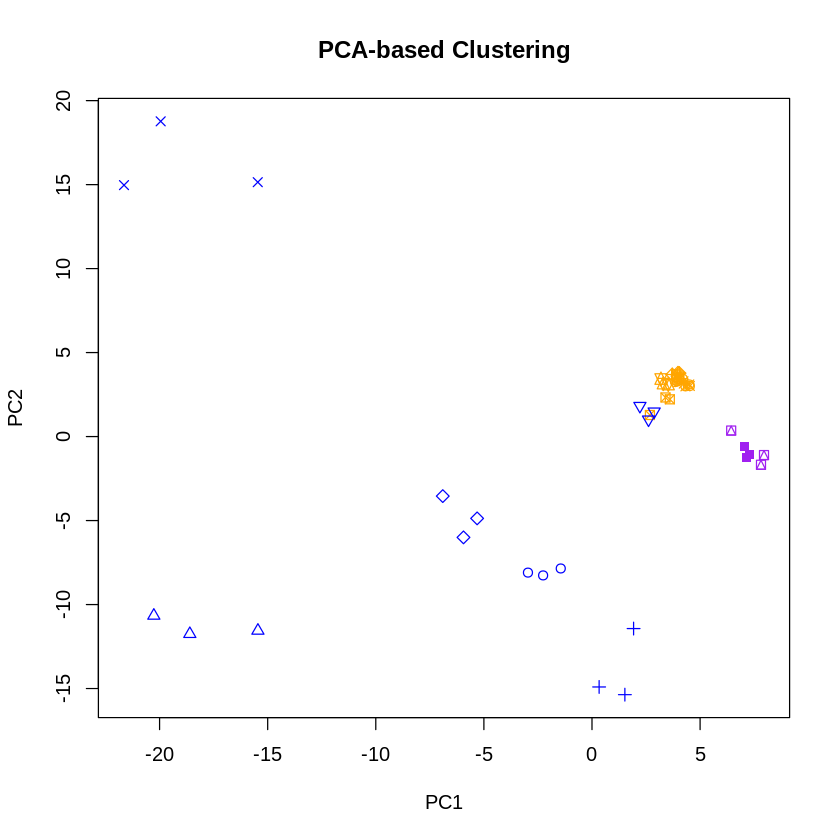

In [6]:
# Plot the PCA results
plot(pc1, pc2, col = tobacco_clr$sample.color, pch = tobacco_clr$sample.pch,
     xlab = "PC1", ylab = "PC2", main = "PCA-based Clustering")

### Interpretation:

#### Clusters Identification:

- The samples form distinct clusters in the PCA plot, suggesting that different groups of samples have distinct microbial compositions.

- The clusters can be identified by their distinct positions in the plot, which are colored and shaped differently based on the provided metadata (sample.color and sample.pch).

#### Color and Shape Coding:

- Different colors and shapes represent different types of samples. For example:
  - Blue crosses (+), triangles (△), and diamonds (◇) form distinct groups on the left side of the plot.
  - Orange triangles (▽) cluster together in the upper right.
  - Purple squares (□) cluster in the lower right.

- These colors and shapes help differentiate between sample types (e.g., different types of smokeless tobacco products).

#### Principal Components:

- PC1 (x-axis) and PC2 (y-axis) are the principal components that capture the most variance in the dataset.

- The variance captured by each component can be inferred from the spread of the points along the axes. The wider the spread, the more variance that component explains.

#### Distance and Similarity:

- Samples that are close to each other in the plot are more similar in their microbial compositions.

- Samples that are far apart indicate a higher degree of dissimilarity.

## 2. The data matrix "tobacco_clrH" is calculated from a phylogenetic tree, a branching diagram that characterizes the evolutionary relationship between OTUs (microbes). Perform the CoIA on "tobacco_clrdata" and "tobacco_clrH" and construct a CoIA-plot to show the sample clustering of the observations.

In [8]:
if(!require(ade4)) install.packages("ade4")

Loading required package: ade4

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ade4’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’, ‘RcppArmadillo’




In [9]:
# Load packages
library(ade4)

In [13]:
# Convert similarity matrix to a distance matrix
distance_matrix <- as.dist(1 - tobacco_clr$H)


In [15]:
# Perform CoIA
coia_result <- coinertia(dudi.pca(tobacco_clr$data, scannf = FALSE, nf = 2),
                         dudi.pco(distance_matrix, scannf = FALSE, nf = 2), scannf = FALSE)


In [16]:
# Extract the coordinates for plotting
coia_coord1 <- coia_result$l1[, 1]
coia_coord2 <- coia_result$l1[, 2]

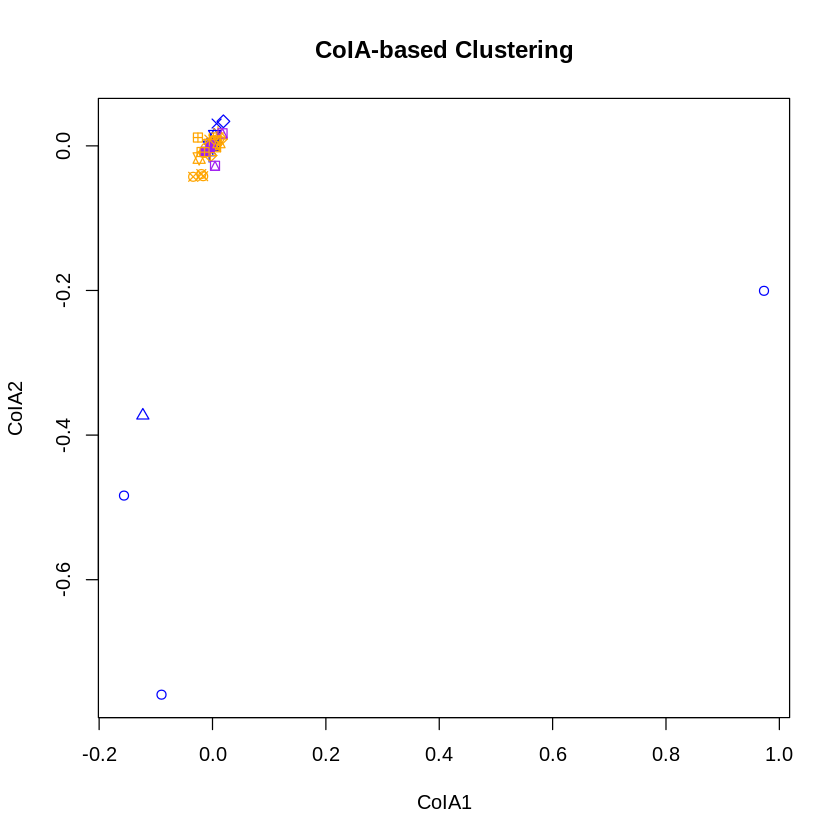

In [17]:
# Plot the CoIA results
plot(coia_coord1, coia_coord2, col = tobacco_clr$sample.color, pch = tobacco_clr$sample.pch,
     xlab = "CoIA1", ylab = "CoIA2", main = "CoIA-based Clustering")

## Interpretation:

### Cluster Formation:

- The CoIA-based clustering plot shows a tight grouping of most samples in the top left corner, with only a few samples spread out along the CoIA1 and CoIA2 axes.
    
- This tight clustering suggests that most of the samples share similar characteristics in the context of the CoIA analysis, which takes into account both the data matrix and the phylogenetic similarity matrix.

### Separation of Clusters:

- Compared to the PCA-based clustering, the CoIA plot shows less separation between different clusters. This may indicate that the co-inertia analysis captures different aspects of the data, possibly focusing more on the shared variance between the two datasets rather than the variance within the microbial counts alone.

### Outliers:

- There are a few points (blue triangles and circles) that are far removed from the main cluster. These points may represent samples with unique features or differences in their phylogenetic relationships compared to the rest of the samples.

## 3. Compare the plots constructed in Steps 1 and 2. Discuss their similarities and differences.

### Clustering Structure:

- The PCA plot shows a more spread-out distribution of points, with distinct clusters forming along the PC1 and PC2 axes. These clusters are well-separated, suggesting that the first two principal components capture significant variation in the data.

- The CoIA plot, on the other hand, shows a much tighter clustering of most samples in one region of the plot, with fewer outliers. This suggests that the CoIA is capturing different aspects of the data, particularly the co-variance between the microbial counts and the phylogenetic relationships.

### Separation of Groups:

- In the PCA plot, there is clear separation between different clusters, which may correspond to different tobacco products or sample types.

- In the CoIA plot, while there is still some degree of separation, the majority of the points are tightly packed together, indicating that the CoIA focuses more on the shared structure between the datasets (i.e., the microbial counts and the phylogenetic tree).

Outliers:

- The PCA plot shows several outliers, especially along the PC1 axis, indicating samples that are significantly different from others in terms of the principal components.
    
- The CoIA plot also has outliers, but they are fewer and located in a different region of the plot. This difference may indicate that CoIA emphasizes different relationships within the data, potentially those that are not as prominent in the PCA analysis.